# Practical 3 

### - Name: Niraj Italiya 
### - Enrollment No: 190130107041
### - Subject: Machine Learning
### - Aim: Use K-means clustering for cancer dataset and analyse its output with output of 1st and 2nd practical's.

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [49]:
df = load_breast_cancer()
features = pd.DataFrame(df.data, columns=df.feature_names)
target = pd.DataFrame(df.target)

In [50]:
features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [51]:
data = pd.concat([features, target], axis=1)

In [52]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,0
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [53]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X = ss.fit_transform(data.iloc[:,:-1].values)

In [54]:
X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [55]:
target

,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [56]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1,11):
    km = KMeans(n_clusters=k, init='k-means++', random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)
wcss

[17070.000000000007,
 11595.461473962347,
 10061.797818243696,
 9259.536571689418,
 8556.323483890925,
 7971.5305652009465,
 7538.074569402962,
 7190.657345145712,
 6946.178854848678,
 6638.313534537474]

Text(0, 0.5, 'WCSS')

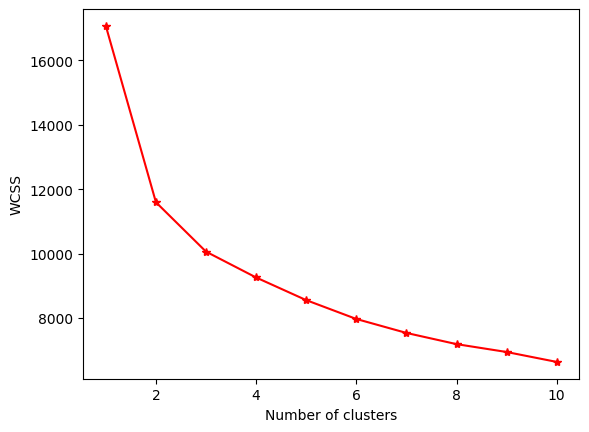

In [57]:
plt.plot(range(1,11), wcss, marker='*', color='red')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [58]:
km = KMeans(n_clusters=2, init='k-means++', random_state=42)
y_pred = km.fit_predict(X)

In [59]:
y_test = df.target

In [60]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

print('Accuracy Score : ', accuracy_score(y_pred, y_test))
print('Precision Score : ', precision_score(y_pred, y_test))
print('Recall Score : ', recall_score(y_pred, y_test))
print('f1 Score : ', f1_score(y_pred, y_test))

Accuracy Score :  0.9103690685413005
Precision Score :  0.9607843137254902
Recall Score :  0.9026315789473685
f1 Score :  0.9308005427408413


In [61]:
confusion_matrix(y_pred, y_test)

array([[175,  14],
       [ 37, 343]], dtype=int64)

In [62]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.83      0.93      0.87       189
           1       0.96      0.90      0.93       380

    accuracy                           0.91       569
   macro avg       0.89      0.91      0.90       569
weighted avg       0.92      0.91      0.91       569



### We got an accuracy 91% using KMeans Clustering.